# Digits recognition

* Acknowledgment:  This notebook was originally created by Pedro Vendas Costa.*
* Acknowledgment:  This notebook is being used with the kind permission of Kelwin Fernandes and Ricardo Cruz. *

We are going to use:
- numpy for the linear algebra
- matplotlib to draw graphics

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

One of the most famous data available is MNIST which has thousands of hand-written digits: 0, 1, 2, 3, 4, ..., 8, 9!

The digits are in gray-scale. Each digit is therefore a matrix.

Let's import the data...

In [2]:
filename = 'mnist.pkl.gz'

import gzip
import pickle
with gzip.open(filename, 'rb') as f:
    digits = pickle.load(f, encoding='latin-1')

The digits are split in:
- train set
- test set.

This is very common in data mining. We use the training set to train our model. Then, we evaluate it using the test set.

In [3]:
Xtr, ytr = digits[0]
Xts, yts = digits[1]

In [4]:
len(Xtr), len(Xts)

(50000, 10000)

In [5]:
Xtr.shape

(50000, 784)

Each image is $28$ by $28$ in size and is therefore represented as a vector of size $28\times28=784$.

In [6]:
Xtr[0].shape

(784,)

Let us draw one of the digits:

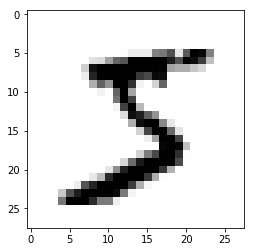

In [7]:
x = Xtr[0]
x = x.reshape((28, 28))

plt.imshow(x, cmap=plt.cm.gray_r)
plt.show()

**Exercise:** Do a loop and draw the first 10 digits in the training set...

*hint: use* for i in range(10)

# Logistic Regression

We are going to detect the digits using a model called "logistic regression".

Each image is made of numbers. Each number is multiplied by a weight and contributes to the probability of being a 0 or 1 or ... 9.

For example, say that $w = [2, -2]$ and $b = 2$:

<img src="logistic.png" />

When we feed the model with $X = [1, 4]$, the model computes $X[0] \times w[0] + X[1] \times w[1] + b$ and then squashes the result to be between 0 and 1 using the sigmoid function.

In other words, the model computes $P(y\ |\ x) = \sigma(x \cdot w + b)$. The algorithm learns the best set of $w$ and $b$ that explain the data.

------------------

Let us try to see if we detect correctly the 0...

We are going to use the implementation from scikit-learn. See the [documentation here.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(C=1)
m.fit(Xtr, ytr)
yp = m.predict(Xts)

Several "metrics" exist to see how well our model is...

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytr, m.predict(Xtr)))

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yts, yp))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yts, yp))

Let us look at the weights for detecting 0...

In [ ]:
m.coef_[0].shape

Each weight corresponds to a pixel in the image.

The shape of the weights is $784$, therefore we can convert them back to $28\times28$.

In [ ]:
for i in range(10):
    coef = m.coef_[i]
    plt.imshow(coef.reshape((28, 28)))
    plt.colorbar()
    plt.show()

**Exercise:** Try reducing the C hyperparameter to see what happens...

`C=0.0001`

------

What is going on?

The logitistic regression tries to minimize the difference between its predictions and the true numbers. But if $C$ is small, then it will punish high coefficients. This avoids any individual pixel having a big impact in the result, and forces the logistic regression to learn more hollistically.

----

Let's see some examples we have failed on:

In [ ]:
i = 0
for x, _yts, _yp in zip(Xts, yts, yp):
    if _yts != _yp:
        print(_yp)
        plt.imshow(x.reshape((28, 28)), cmap=plt.cm.gray_r)
        plt.show()
        i += 1
        if i == 10:
            break

# Artificial Neural Networks

Another interesting model are artificial neural networks.

See the [documentation in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) if you want to use that model.

The idea is to use lots of logistic regressions on top of each other.

<img src="ann.jpg" />

More complicated neural networks exist as well... We are not going to enter there today...!

# Decision Tree

Another interesting model are decision trees.

<img src="dtree.gif" />

Let's apply this model to this problem.

Firstly, let's make images black-and-white. This makes our decision trees nicer to interpret because each decision will be only `If(Pixel(x,y) = 1) then ...`

In [ ]:
Xtr = (Xtr > 0.5).astype(int)
Xts = (Xts > 0.5).astype(int)

In [ ]:
plt.imshow(Xtr[0].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show()

**Exercise:** Use a `DecisionTreeClassifier`. See the [documentation here.](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Test the accuracy of the model.

*Optional:* draw the decision tree (the following code only works if you have graphviz installed.)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(m, 'mytree.dot', label='none', impurity=False, rotate=True)
with open('mytree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**Exercise:** change the `max_depth` hyperparameter and see the impact on the tree.

---

The more complex a model is, the harder it is to understand it becomes.

Sometimes, we want to understand what is going on.

Here, we go through some of the images, and cover parts of the image to see if the model misclassifies the image in those cases.

In [ ]:
for i in range(10):
    print(yts[i])
    X = Xts[i]
    yps = np.zeros((28, 28))
    for x in range(0, 28, 5):
        for y in range(0, 28, 5):
            img = X.copy().reshape((28, 28))
            img[y:y+5, x:x+5] = 1
            yps[y:y+5, x:x+5] = m.predict(img.flatten()[np.newaxis, :])

    plt.imshow(X.reshape((28, 28)), cmap=plt.cm.gray)
    plt.imshow(yps, cmap=plt.cm.jet, alpha=0.8)
    plt.colorbar()
    plt.show()